# Effect of a and b in van der Waals isotherms (reduced variables)


**Code:** #11C-000

**File:** `apps/van_der_waals/effect_of_a_and_b_reduces.ipynb`

**Run it online:** [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/jongablop/MinervaLab/master?urlpath=%2Fnotebooks%2Fapps%2Fvan_der_waals%2Feffect_of_a_and_b_reduced.ipynb)

-----------

The aim of this notebook is to visualize the effect of a and b parameters on van der Waals' isotherms (reduced variables).

## Interface

The main interface (``main_block_11C_000``) is divided in two HBox: ``top_block_11C_000`` and ``bottom_block_11C_000``. ``top_block_11C_000`` contains of 5 bqplot Figures: ``fig_11C_001``, ``fig_11C_002``, ``fig_11C_003``, ``fig_11C_004`` and ``fig_11C_005``.  

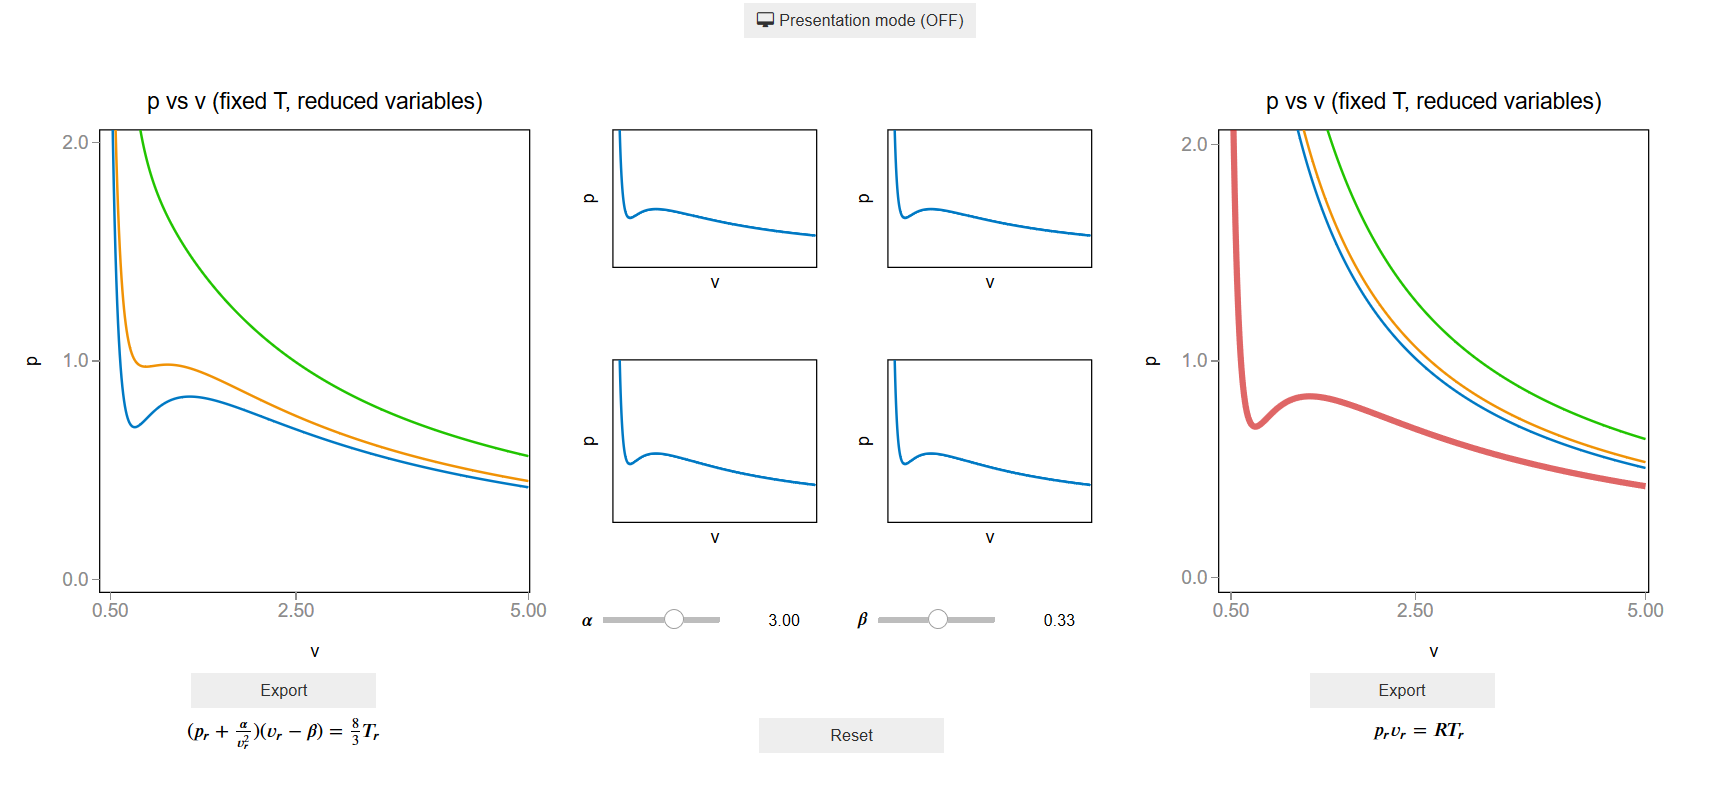

In [12]:
from IPython.display import Image
Image(filename='../../static/images/11C-000_1.png')

## CSS
A custom `css` file is used to improve the interface of this application. It can be found [here](https://github.com/jongablop/MinervaLab/blob/master/static/custom.css).

In [2]:
from IPython.display import HTML
display(HTML("<head><link rel='stylesheet' type='text/css' href='./../../static/custom.css'></head>"))
display(HTML("<style>.container { width:100% !important; }</style>"))
display(HTML("<style>.widget-label { display: contents !important; }</style>"))
display(HTML("<style>.slider-container { margin: 12px !important; }</style>"))

## Packages

In [3]:
from bqplot import *
import bqplot as bq
import bqplot.marks as bqm
import bqplot.scales as bqs
import bqplot.axes as bqa

import ipywidgets as widgets

import urllib.parse
import webbrowser

import sys

## Physical functions

This are the functions that have a physical meaning:

- `get_relative_isotherms_params`

In [4]:
def get_relative_isotherms_params(alpha, beta, v_range, T_range):
    """This function calculates the theoretical p(v, T) plane 
        (in reduced coordinates) according to van der Waals
        equation of state from a given range of volumes
        and tenperatures and taking into account the values
        of alpha and beta.
        
    Args:
        alpha: The value of the a parameter.\n
        alpha: The value of the b parameter.\n
        v_range: An array containing the values of v
        (in reduced coordinates)for which the isotherms must be 
        calculated.\n
        T_range: An array containing the values of T
        (in reduced coordinates)for which the isotherms must be 
        calculated.\n
        
        
    Returns:
        isotherms: A list consisted of numpy arrays containing the
        pressures of each isotherm.
    """

    isotherms = []

    for T in T_range:
        p_R = []
        for v in v_range:
            val = (8.0/3.0*T/(v - beta) - alpha/v**2)
            p_R = np.append(p_R, val)

        isotherms.append(p_R)

    return isotherms

## Functions related to interaction

In [5]:
def update_isotherms(change):
    """This function update the lines 'alpha_line', 'beta_line' and
    'unique_isotherm' when 'alpha_slider_11C_003' or 'beta_slider_11C_004' are
    updated.
    """
    
    obj = change.owner
    T_values = [0.95]

    if obj is alpha_slider_11C_003:

        v_values = np.linspace(0.4, 5.0, 500)
        isotherms = get_relative_isotherms_params(
            alpha_slider_11C_003.value,
            beta_initial,
            v_values,
            T_values
        )
        
        alpha_line.y = isotherms[0]
        
    elif obj is beta_slider_11C_004:

        v_values = np.linspace(0.4, 5.0, 500)
        
        if beta_slider_11C_004.value == 0.0:
            
            v_values = np.linspace(0.4, 5.0, 500)
        
        isotherms = get_relative_isotherms_params(
            alpha_initial,
            beta_slider_11C_004.value,
            v_values,
            T_values
        )
        
        beta_line.x = v_values
        beta_line.y = isotherms[0]
        
    if beta_slider_11C_004.value == 0.0:
        v_values = np.linspace(0.4, 5.0, 500)        
    
    isotherms = get_relative_isotherms_params(
        alpha_slider_11C_003.value,
        beta_slider_11C_004.value,
        v_values,
        T_values
    )
    
    unique_isotherm.x = v_values
    unique_isotherm.y = isotherms[0]

In [6]:
def restart(a):
    """This function sets the values of 'alpha_slider_11C_003'
    and 'beta_slider_11C_004' to their initial ones.
    """
    
    alpha_slider_11C_003.value, beta_slider_11C_004.value = alpha_initial, beta_initial

In [7]:
def change_view(change):
    """This function changes the visualization of all the
    components of the application so they are suitable for
    a projection.\n
    """
    
    obj = change.owner

    if obj.value:
        
        obj.description = 'Presentation mode (ON)'
        
        display(HTML(
            "<style>" \
            ".widget-readout { font-size: 30px ; }" \
            ".widget-label-basic {font-size: 30px;}" \
            "option {font-size: 25px;}" \
            ".p-Widget.jupyter-widgets.widget-slider.widget-vslider.widget-inline-vbox {width: auto}" \
            ".p-Widget .jupyter-widgets .widgets-label {width: auto; height: auto; font-size: 30px;}" \
            ".widget-label {font-size: 30px ; height: auto !important;}" \
            ".p-Widget .bqplot .figure .jupyter-widgets {height: auto !important;}" \
            ".widget-text input[type='number'] {font-size: 30px;height: auto;}" \
            ".option { font-size: 30px ;}" \
            ".p-Widget .jupyter-widgets .jupyter-button.widget-button {font-size: 30px ; width: auto; height: auto;}" \
            ".p-Widget.jupyter-widgets.jupyter-button.widget-toggle-button{font-size: 30px ; width: auto; height: auto;}" \
            ".p-Widget.p-Panel.jupyter-widgets.widget-container.widget-box.widget-vbox {padding-bottom: 30px}" \
            ".bqplot > svg .axis text.axislabel, .bqplot > svg .axis tspan.axislabel {font-size: 30px;}" \
            ".q-grid .slick-cell {font-size: 30px;}" \
            ".slick-column-name {font-size: 30px;}" \
            ".widget-html-content {font-size: 30px;}"
            "</style>"
            )
        )

        for figure in figures:
            
            figure.legend_text = {'font-size': '30px'}
            figure.title_style = {'font-size': '30px'}

            for axis in figure.axes:
                axis.tick_style = {'font-size': '30px'}
                axis.label_style = {'font-size': '30px'}
        
    else:
        
        obj.description = 'Presentation mode (OFF)'
        
        display(HTML(
            "<style>" \
            ".widget-readout { font-size: 14px ;}" \
            ".widget-label-basic {font-size: 14px;}" \
            "option {font-size: 12px;}" \
            ".p-Widget .jupyter-widgets .widgets-label {font-size: 14px;}" \
            ".widget-label {font-size: 14px ;}" \
            ".widget-text input[type='number'] {font-size: 14px;}" \
            ".option { font-size: 14px ;}" \
            ".p-Widget .jupyter-widgets .jupyter-button.widget-button {font-size: 14px;}" \
            ".p-Widget.jupyter-widgets.jupyter-button.widget-toggle-button {font-size: 14px;}" \
            ".bqplot > svg .axis text.axislabel, .bqplot > svg .axis tspan.axislabel {font-size: 14px;}" \
            ".q-grid .slick-cell {font-size: 14px;}" \
            ".slick-column-name {font-size: 14px;}" \
            ".widget-html-content {font-size: 14px;}"
            "</style>"
            )
        )
        
        for figure in figures:
            
            figure.legend_text = {'font-size': '14px'}
            figure.title_style = {'font-size': '20px'}

            for axis in figure.axes:
                axis.tick_style = {'font-size': '14px'}
                axis.label_style = {'font-size': '14px'}

In [8]:
def prepare_export(button):
    """This function sends the selected plot to the 'export_plot'
    function.
    """

    if button is prepare_export_fig_11C_001_button:
        
        export_plot(fig_11C_001)
        
    elif button is prepare_export_fig_11C_005_button:
        
        export_plot(fig_11C_005)

In [9]:
def export_plot(plot):
    """This function sends the selected plot to the export module.
    """
    
    global data
    
    text_lines = []
    
    np.set_printoptions(threshold=sys.maxsize)
    
    tooltips = []
    
    for mark in plot.marks:
        tooltips.append(mark.tooltip)
        mark.tooltip = None
    
    data =  repr((plot, text_lines))
    
    %store data
    
    rel_url = "../../../apps/modules/export_module.ipynb"
    abs_url = urllib.parse.urljoin(notebook_url, rel_url)

    if not webbrowser.open(abs_url):
        go_to_export_button.value = "<form action=" + abs_url + " target='_blank'><button type=''submit''>Open in export module</button></form>"
        
    for i in range(len(plot.marks)):
        mark = plot.marks[i]
        mark.tooltip = tooltips[i]

In [10]:
%%javascript 

//Get the URL of the current notebook

var kernel = Jupyter.notebook.kernel; 
var command = ["notebook_url = ",
               "'", window.location.href, "'" ].join('')

kernel.execute(command)

<IPython.core.display.Javascript object>

## Main interface

In [ ]:
alpha_initial = 3.0 #0.0 < alpha < 3.0
beta_initial = 0.33 #0.0 < beta < 0.33

a, b = 5.536, 0.03049 #L^2 bar/mol^2, L/mol

T_values = [0.95, 1.0, 1.2]
v_values = np.linspace(0.4, 5.0, 500)
colors = ['#0079c4','#f09205','#21c400']

p_values = get_relative_isotherms_params(
    alpha_initial,
    beta_initial,
    v_values,
    T_values
)

#######################################
#######CREATE THE FIGURES##############
#######################################


fig_11C_001 = bq.Figure(
    title='p vs v (fixed T, reduced variables)',
    marks=[],
    axes=[],
    animation_duration=0,
    legend_location='top-right',
    background_style= {'fill': 'white',  'stroke': 'black'},
    fig_margin=dict(top=70, bottom=60, left=80, right=30),
    toolbar = True,
    layout = widgets.Layout(
        width='100%',
        height='500px'
    )
)

fig_11C_002 = bq.Figure(
    title='',
    marks=[],
    axes=[],
    animation_duration=0,
    legend_location='top-right',
    background_style= {'fill': 'white',  'stroke': 'black'},
    fig_margin=dict(top=30, bottom=60, left=25, right=10),
    toolbar = True,
    layout = widgets.Layout(
        width='90%',
        height='40%'
    )
)

fig_11C_003 = bq.Figure(
    title='',
    marks=[],
    axes=[],
    animation_duration=0,
    legend_location='top-right',
    background_style= {'fill': 'white',  'stroke': 'black'},
    fig_margin=dict(top=10, bottom=60, left=25, right=10),
    toolbar = True,
    layout = widgets.Layout(
        width='90%',
        height='40%'
    )
)

fig_11C_004 = bq.Figure(
    title='',
    marks=[],
    axes=[],
    animation_duration=0,
    legend_location='top-right',
    background_style= {'fill': 'white',  'stroke': 'black'},
    fig_margin=dict(top=10, bottom=60, left=25, right=10),
    toolbar = True,
    layout = widgets.Layout(
        width='90%',
        height='40%'
    )
)

fig_11C_005 = bq.Figure(
    title='p vs v (fixed T, reduced variables)',
    marks=[],
    axes=[],
    animation_duration=0,
    legend_location='top-right',
    background_style= {'fill': 'white',  'stroke': 'black'},
    fig_margin=dict(top=70, bottom=60, left=80, right=30),
    toolbar = True,
    layout = widgets.Layout(
        width='100%',
        height='500px'
    )
)

scale_x = bqs.LinearScale(min = 0.4, max = 5.0)
scale_y = bqs.LinearScale(min = 0, max = 2.0)

axis_x = bqa.Axis(
    scale=scale_x,
    tick_format='.2f',
    tick_style={'font-size': '15px'},
    tick_values = [0.5, 2.5, 5.0],
    grid_lines = 'none',
    grid_color = '#8e8e8e', 
    label='v',
    label_location='middle',
    label_style={'stroke': 'black', 'default-size': 35},
    label_offset='50px'
)

axis_y = bqa.Axis(
    scale=scale_y,
    tick_format='.1f',
    tick_style={'font-size': '15px'},
    tick_values = [0, 1, 2],
    grid_lines = 'none',
    grid_color = '#8e8e8e', 
    orientation='vertical',
    label='p',
    label_location='middle',
    label_style={'stroke': 'red', 'default_size': 35},
    label_offset='50px'
)

axis_x_no_ticks = bqa.Axis(
    scale=scale_x,
    tick_format='.2f',
    tick_style={'font-size': '15px'},
    num_ticks=0,
    grid_lines = 'none',
    grid_color = '#8e8e8e', 
    label='v',
    label_location='middle',
    label_style={'stroke': 'black', 'default-size': 35},
    label_offset='15px'
)

axis_y_no_ticks = bqa.Axis(
    scale=scale_y,
    tick_format='.0f',
    tick_style={'font-size': '15px'},
    num_ticks=0,
    grid_lines = 'none',
    grid_color = '#8e8e8e', 
    orientation='vertical',
    label='p',
    label_location='middle',
    label_style={'stroke': 'red', 'default_size': 35},
    label_offset='15px'
)

fig_11C_001.axes = [axis_x, axis_y]
fig_11C_002.axes = [axis_x_no_ticks, axis_y_no_ticks]
fig_11C_003.axes = [axis_x_no_ticks, axis_y_no_ticks]
fig_11C_004.axes = [axis_x_no_ticks, axis_y_no_ticks]
fig_11C_005.axes = [axis_x, axis_y]


#######################################
##############MARKS####################
#######################################

x_values = [v_values for i in range(len(p_values))]
y_values = []
color_values = []
label_values = []

for i in range(len(p_values)):
    
    y_values.append(p_values[i])
    color_values.append(colors[i])
    label_values.append(str(T_values[i]))

new_state = bqm.Lines(
    x = x_values, 
    y = y_values, 
    scales = {'x': scale_x, 'y': scale_y}, 
    opacities = [1.0 for elem in p_values],
    visible = True,
    colors = color_values,
    labels = label_values,
)

old_state = bqm.Lines(
    x = x_values, 
    y = y_values, 
    scales = {'x': scale_x, 'y': scale_y}, 
    opacities = [1.0 for elem in p_values],
    visible = True,
    colors = color_values,
    labels = label_values,
)

current_state = bqm.Lines(
    x = x_values[0], 
    y = y_values[0], 
    scales = {'x': scale_x, 'y': scale_y}, 
    opacities = [1.0 for elem in p_values],
    visible = True,
    colors = color_values,
    labels = label_values,
)

alpha_line = bqm.Lines(
    x = x_values[0], 
    y = y_values[0], 
    scales = {'x': scale_x, 'y': scale_y}, 
    opacities = [1.0 for elem in p_values],
    visible = True,
    colors = color_values,
    labels = label_values,
)

beta_line = bqm.Lines(
    x = x_values[0], 
    y = y_values[0], 
    scales = {'x': scale_x, 'y': scale_y}, 
    opacities = [1.0 for elem in p_values],
    visible = True,
    colors = color_values,
    labels = label_values,
)

ideal_isotherms = get_relative_isotherms_params(
    0,
    0,
    v_values,
    T_values
)

ideal_line = bqm.Lines(
    x = x_values, 
    y = ideal_isotherms, 
    scales = {'x': scale_x, 'y': scale_y}, 
    opacities = [1.0 for elem in p_values],
    visible = True,
    colors = color_values,
    labels = label_values,
)

unique_isotherm = bqm.Lines(
    x = x_values[0], 
    y = y_values[0], 
    scales = {'x': scale_x, 'y': scale_y}, 
    opacities = [0.6],
    visible = True,
    colors = ['#c90000'],
    labels = [label_values[0]],
    stroke_width = 5
)

fig_11C_001.marks = [old_state]
fig_11C_002.marks = [current_state]
fig_11C_003.marks = [alpha_line]
fig_11C_004.marks = [beta_line]
fig_11C_005.marks = [ideal_line, unique_isotherm]

alpha_slider_11C_003 = widgets.FloatSlider(
    min=0.0,
    max=5.0,
    step=0.01,
    value=alpha_initial,
    description=r"\( \alpha \)",
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    layout=widgets.Layout(width='90%')
)

alpha_slider_11C_003.observe(update_isotherms, 'value')

beta_slider_11C_004 = widgets.FloatSlider(
    min=0.0,
    max=0.66,
    step=0.001,
    value=beta_initial,
    description=r"\( \beta \)",
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    layout=widgets.Layout(width='90%')
)

beta_slider_11C_004.observe(update_isotherms, 'value')

return_button = widgets.Button(
    description='Reset',
    disabled=False,
    button_style='',
    tooltip='Return to the original state',
)

return_button.on_click(restart)

change_view_button = widgets.ToggleButton(
    value=False,
    description='Presentation mode (OFF)',
    disabled=False,
    button_style='',
    tooltip='',
    icon='desktop',
    layout=widgets.Layout(
        width='initial',
        align_self='center'
    )
)

change_view_button.observe(change_view, 'value')

prepare_export_fig_11C_001_button = widgets.Button(
    description='Export',
    disabled=False,
    button_style='',
    tooltip='',
)

prepare_export_fig_11C_001_button.on_click(prepare_export)

prepare_export_fig_11C_005_button = widgets.Button(
    description='Export',
    disabled=False,
    button_style='',
    tooltip='',
)

prepare_export_fig_11C_005_button.on_click(prepare_export)

top_block_11C_000 = widgets.HBox(
    [],
    layout=widgets.Layout(
        width='100%',
        align_self='center'
    )
)

top_block_11C_000.children = [
    widgets.VBox([
        fig_11C_001,
        prepare_export_fig_11C_001_button
    ],
        layout=widgets.Layout(
            width='33%',
            align_items='center'
        )
    ),
    widgets.VBox([
        fig_11C_002,
        fig_11C_003,
        alpha_slider_11C_003
    ], 
        layout=widgets.Layout(
            width='16%',
            height='500px',
            align_items='center',
            margin='40px 0 0 0'
        )
    ),
    widgets.VBox([
        fig_11C_002,
        fig_11C_004,
        beta_slider_11C_004
    ],
        layout=widgets.Layout(
            width='16%',
            height='500px',
            align_items='center',
            margin='40px 0 0 0'
        )
    ),
    widgets.VBox([
        fig_11C_005,
        prepare_export_fig_11C_005_button
    ],
        layout=widgets.Layout(
            width='33%',
            align_items='center'
        )
    ),
]

bottom_block_11C_000 = widgets.HBox(
    [],
    layout=widgets.Layout(
        width='100%',
        height='60px',
        align_self='center'
    )
)

bottom_block_11C_000.children = [
    widgets.VBox([
        widgets.HTMLMath(
            value=r"\( (p_r + \frac{\alpha}{v_r^2})(v_r - \beta) = \frac{8}{3} T_r \)"
        )],
            layout=widgets.Layout(
                width='33%',
                align_items='center'
            )
    ),
    widgets.VBox(
        [return_button],
        layout=widgets.Layout(
            width='33%',
            align_items='center'
        )
    ),
    widgets.VBox([
        widgets.HTMLMath(
            value=r"\( p_r v_r = R T_r \)"
        )],
            layout=widgets.Layout(
                width='33%',
                align_items='center'
            )
    )
]

main_block_11C_000 = widgets.VBox(
    [],
    layout=widgets.Layout(
        width='100%',
        align_items='center'
    )
)

main_block_11C_000.children = [
    change_view_button,
    top_block_11C_000,
    bottom_block_11C_000
]

figures = [
    fig_11C_001,
    fig_11C_002,
    fig_11C_003,
    fig_11C_004,
    fig_11C_005,
]

main_block_11C_000